# **STOCK SENTIMENT ANALYSIS**

# Importing necessary libraries and reading the dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv('Stock_Dataa.csv', encoding="ISO-8859-1")
#this encoding technique is imporatnt otherwise the dataset wont be readable
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft


0- news will have a negative headline
1- news will have a positive headline

# EDA and DATA PREPROCESSING

In [3]:
df.shape

(4101, 27)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4101 entries, 0 to 4100
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    4101 non-null   object
 1   Label   4101 non-null   int64 
 2   Top1    4101 non-null   object
 3   Top2    4101 non-null   object
 4   Top3    4101 non-null   object
 5   Top4    4101 non-null   object
 6   Top5    4101 non-null   object
 7   Top6    4101 non-null   object
 8   Top7    4101 non-null   object
 9   Top8    4101 non-null   object
 10  Top9    4101 non-null   object
 11  Top10   4101 non-null   object
 12  Top11   4101 non-null   object
 13  Top12   4101 non-null   object
 14  Top13   4101 non-null   object
 15  Top14   4101 non-null   object
 16  Top15   4101 non-null   object
 17  Top16   4101 non-null   object
 18  Top17   4101 non-null   object
 19  Top18   4101 non-null   object
 20  Top19   4101 non-null   object
 21  Top20   4101 non-null   object
 22  Top21   4101 non-null   

In [5]:
#Split the dataset into training and testing sets
train= df[df['Date']< '20150101' ]
test=df[df['Date']> '20141231']

In [6]:
# Removing punctuations
data = train.iloc[:, 2:27]
data.replace("[^a-zA-Z]", " ", regex=True, inplace=True)

# Renaming column names for ease of access
list1 = [i for i in range(25)]
new_Index = [str(i) for i in list1]
data.columns = new_Index
data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,A hindrance to operations extracts from the...,Scorecard,Hughes instant hit buoys Blues,Jack gets his skates on at ice cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,Derby raise a glass to Strupar s debut double,Southgate strikes Leeds pay the penalty,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl s successor drawn into scandal,The difference between men and women,Sara Denver nurse turned solicitor,Diana s landmine crusade put Tories in a panic,Yeltsin s resignation caught opposition flat f...,Russian roulette,Sold out,Recovering a title
1,Scorecard,The best lake scene,Leader German sleaze inquiry,Cheerio boyo,The main recommendations,Has Cubie killed fees,Has Cubie killed fees,Has Cubie killed fees,Hopkins furious at Foster s lack of Hannibal...,Has Cubie killed fees,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man s extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn t know without the ...,Millennium bug fails to bite
2,Coventry caught on counter by Flo,United s rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,McGrath puts India out of their misery,Blair Witch bandwagon rolls on,...,South Melbourne Australia,Necaxa Mexico,Real Madrid Spain,Raja Casablanca Morocco,Corinthians Brazil,Tony s pet project,Al Nassr Saudi Arabia,Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,Auntie back in fashion even if the dress look...,Shoaib appeal goes to the top,Hussain hurt by shambles but lays blame on e...,England s decade of disasters,Revenge is sweet for jubilant Cronje,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for,Christmas glitches,Upending a table Chopping a line and Scoring ...,Scientific evidence unreliable defence claims,Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake up of failing NHS,Lessons of law s hard heart
4,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers are you all whingers,Hollywood Beyond,Ashes and diamonds,Whingers a formidable minority,Alan Parker part two,Thuggery Toxins and Ties,...,Most everywhere UDIs,Most wanted Chloe lunettes,Return of the cane completely off the agenda,From Sleepy Hollow to Greeneland,Blunkett outlines vision for over s,Embattled Dobson attacks play now pay later ...,Doom and the Dome,What is the north south divide,Aitken released from jail,Gone aloft


In [7]:
# converting headlines to lower case
for index in new_Index:
    data[index]=data[index].str.lower()
data.head(2)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,a hindrance to operations extracts from the...,scorecard,hughes instant hit buoys blues,jack gets his skates on at ice cold alex,chaos as maracana builds up for united,depleted leicester prevail as elliott spoils e...,hungry spurs sense rich pickings,gunners so wide of an easy target,derby raise a glass to strupar s debut double,southgate strikes leeds pay the penalty,...,flintoff injury piles on woe for england,hunters threaten jospin with new battle of the...,kohl s successor drawn into scandal,the difference between men and women,sara denver nurse turned solicitor,diana s landmine crusade put tories in a panic,yeltsin s resignation caught opposition flat f...,russian roulette,sold out,recovering a title
1,scorecard,the best lake scene,leader german sleaze inquiry,cheerio boyo,the main recommendations,has cubie killed fees,has cubie killed fees,has cubie killed fees,hopkins furious at foster s lack of hannibal...,has cubie killed fees,...,on the critical list,the timing of their lives,dear doctor,irish court halts ira man s extradition to nor...,burundi peace initiative fades after rebels re...,pe points the way forward to the ecb,campaigners keep up pressure on nazi war crime...,jane ratcliffe,yet more things you wouldn t know without the ...,millennium bug fails to bite


In [8]:
# combining the headlines to form one paragraph
headlines=[]
for row in range(0,len(data.index)):
    headlines.append(' '.join(str(x) for x in data.iloc[row,0:25]))

This is being done to create a single input variable for your machine learning model, rather than using each headline as a separate feature. By combining the headlines, you are creating a more comprehensive representation of the information contained in the news article, which may improve the performance of your model.

In [9]:
headlines[1]

'scorecard the best lake scene leader  german sleaze inquiry cheerio  boyo the main recommendations has cubie killed fees  has cubie killed fees  has cubie killed fees  hopkins  furious  at foster s lack of hannibal appetite has cubie killed fees  a tale of two tails i say what i like and i like what i say elbows  eyes and nipples task force to assess risk of asteroid collision how i found myself at last on the critical list the timing of their lives dear doctor irish court halts ira man s extradition to northern ireland burundi peace initiative fades after rebels reject mandela as mediator pe points the way forward to the ecb campaigners keep up pressure on nazi war crimes suspect jane ratcliffe yet more things you wouldn t know without the movies millennium bug fails to bite'

In [10]:
#joining all the 25 headlines of a particular news article into one paragraph.
' '.join(str(x) for x in data.iloc[1,0:25])

'scorecard the best lake scene leader  german sleaze inquiry cheerio  boyo the main recommendations has cubie killed fees  has cubie killed fees  has cubie killed fees  hopkins  furious  at foster s lack of hannibal appetite has cubie killed fees  a tale of two tails i say what i like and i like what i say elbows  eyes and nipples task force to assess risk of asteroid collision how i found myself at last on the critical list the timing of their lives dear doctor irish court halts ira man s extradition to northern ireland burundi peace initiative fades after rebels reject mandela as mediator pe points the way forward to the ecb campaigners keep up pressure on nazi war crimes suspect jane ratcliffe yet more things you wouldn t know without the movies millennium bug fails to bite'

In [11]:
headlines = []
for row in range(0,len(data.index)):
    headlines.append(' '.join(str(x) for x in data.iloc[row,0:25]))

This code creates a list called "headlines" that contains concatenated headlines from each row of the input data. It loops through each row of the "data" DataFrame and concatenates the first 25 columns (which contain the headlines for each day) into a single string using the join() method. The resulting list contains a single string for each day, made up of all the headlines for that day concatenated together.

In [12]:
headlines[0]

'a  hindrance to operations   extracts from the leaked reports scorecard hughes  instant hit buoys blues jack gets his skates on at ice cold alex chaos as maracana builds up for united depleted leicester prevail as elliott spoils everton s party hungry spurs sense rich pickings gunners so wide of an easy target derby raise a glass to strupar s debut double southgate strikes  leeds pay the penalty hammers hand robson a youthful lesson saints party like it s      wear wolves have turned into lambs stump mike catches testy gough s taunt langer escapes to hit     flintoff injury piles on woe for england hunters threaten jospin with new battle of the somme kohl s successor drawn into scandal the difference between men and women sara denver  nurse turned solicitor diana s landmine crusade put tories in a panic yeltsin s resignation caught opposition flat footed russian roulette sold out recovering a title'

# Feature Engineering

## Count Vectorizer

In natural language processing, a common approach to analyze text data is to convert the text into a numerical representation that machine learning algorithms can understand. One of the simplest methods for doing this is the bag-of-words model.

The bag-of-words model is a way of representing text data as a bag (multiset) of its words, disregarding grammar and word order but keeping track of the number of occurrences of each word. The model assumes that the meaning of a document is determined by the frequency of its words.

To create a bag-of-words representation, we first need to create a vocabulary of all the words that appear in our text data. Then, we represent each document in our dataset as a vector of word frequencies, where each element in the vector corresponds to the frequency of a particular word in the vocabulary.

In Python, we can use the CountVectorizer class from scikit-learn to create a bag-of-words representation of our text data. We pass the text data to the CountVectorizer's fit_transform method, which returns a sparse matrix where each row represents a document and each column represents a word in the vocabulary. The value in each element of the matrix is the frequency of the corresponding word in the corresponding document.

In the code, the variable cv is an instance of the CountVectorizer class with ngram_range=(2,2) set, which means that we are considering pairs of adjacent words in each document as our features. The train_set variable is then created by calling the fit_transform method of the cv object on the headlines list, which contains all the concatenated headlines.

In [13]:
#CountVectorizer: to convert text to vectors; helps create bag of words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

In [14]:
# implement of BAG OF WORDS
cv= CountVectorizer(ngram_range=(2,2))  #ngram is (2,2) as im converting two words together
train_set= cv.fit_transform(headlines)

In [15]:
train_set


<3975x584289 sparse matrix of type '<class 'numpy.int64'>'
	with 1075856 stored elements in Compressed Sparse Row format>

# Visualisation of data

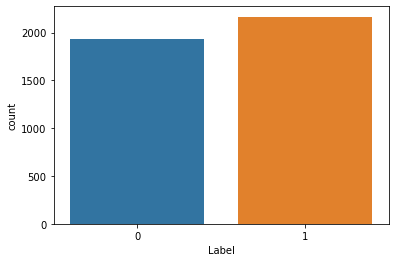

In [16]:
#Visualize the distribution of the target variable
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Label', data=df)
plt.show()


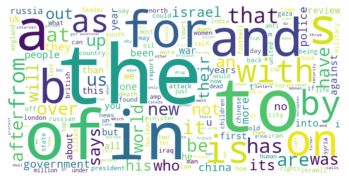

In [18]:
#Visualize the most frequent words in the headlines
from collections import Counter
from wordcloud import WordCloud

all_headlines = ' '.join(headlines)
word_count = Counter(all_headlines.split())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_count)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


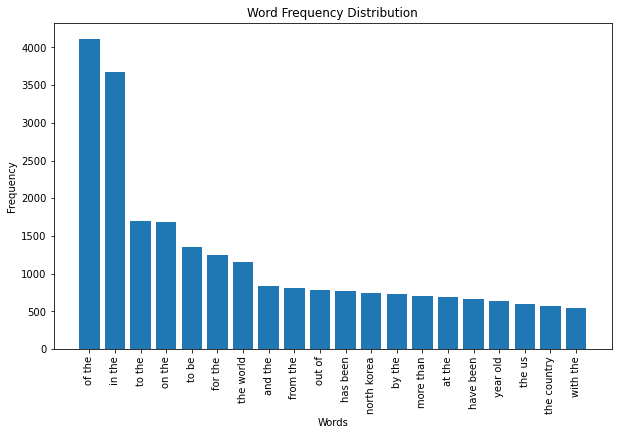

In [21]:
# Plot word frequency distribution
import warnings
warnings.filterwarnings('ignore', category=FutureWarning) # Suppress deprecation warning

freqs = np.asarray(train_set.sum(axis=0)).ravel().tolist()
words = cv.get_feature_names_out()
word_freq = dict(zip(words, freqs))
sorted_word_freq = dict(sorted(word_freq.items(), key=lambda item: item[1], reverse=True))

plt.figure(figsize=(10, 6))
plt.bar(range(20), list(sorted_word_freq.values())[:20], align='center')
plt.xticks(range(20), list(sorted_word_freq.keys())[:20], rotation=90)
plt.title('Word Frequency Distribution')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


# Analyze the sentiment of the headlines

This code uses the SentimentIntensityAnalyzer from the nltk.sentiment module to calculate the sentiment score for each headline in the headlines list. The sentiment score is a measure of how positive or negative a text is, with values ranging from -1 (extremely negative) to +1 (extremely positive).

The for loop iterates over each headline in headlines and applies the polarity_scores method of the SentimentIntensityAnalyzer to calculate the sentiment score. The sentiment score is then appended to the sentiments list.

Finally, sns.histplot from the Seaborn library is used to create a histogram of the sentiment scores, with 20 bins and a kernel density estimate (KDE) overlaid on top of the histogram. This allows for visualization of the distribution of sentiment scores in the headlines. The plt.show() function is used to display the plot.

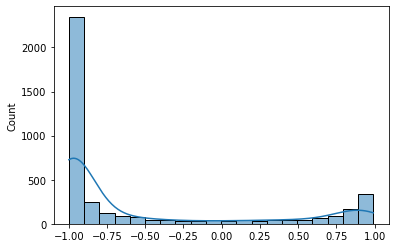

In [17]:
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

sentiments = []
for headline in headlines:
    polarity = sia.polarity_scores(headline)
    sentiments.append(polarity['compound'])

sns.histplot(sentiments, bins=20, kde=True)
plt.show()


Most values are showcasing a negative sentiment score of the headlines.

# Train the model on the training set and evaluate on the testing set

## Random Forest 

In [24]:
# Import the Random Forest Classifier from scikit-learn
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier with 200 estimators and entropy criterion
random_classifier = RandomForestClassifier(n_estimators=200, criterion='entropy')

# Fit the classifier to the training data
random_classifier.fit(train_set, train['Label'])

 # predict for test dataset
test_transform=[]
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))
test_dataset= cv.transform(test_transform)
predictions= random_classifier.predict(test_dataset)

RandomForestClassifier(criterion='entropy', n_estimators=200)

The model was initialized with 200 estimators to achieve a balance between model performance and training time.

In [26]:
predictions

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,

In [28]:
#import library to check accuracy
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report


matrix= confusion_matrix(test["Label"],predictions)
print(matrix)
score= accuracy_score(test["Label"],predictions)
print(score)
report= classification_report(test['Label'],predictions)
print(report)

[[138  48]
 [  8 184]]
0.8518518518518519
              precision    recall  f1-score   support

           0       0.95      0.74      0.83       186
           1       0.79      0.96      0.87       192

    accuracy                           0.85       378
   macro avg       0.87      0.85      0.85       378
weighted avg       0.87      0.85      0.85       378



While our current accuracy of 85% is good, it may be possible to improve it further by experimenting with different values of hyperparameters and finding the best combination. Hyperparameter tuning can be time-consuming and computationally expensive, but it is worth exploring if you want to optimize the performance of your model.

### Hyperparameter tuning:

In [29]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Create a random forest classifier
rfc = RandomForestClassifier()

# Perform a randomized search over the parameter grid
random_search = RandomizedSearchCV(
    estimator=rfc,
    param_distributions=param_grid,
    n_iter=25,
    scoring='accuracy',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit the randomized search to the training data
random_search.fit(train_set, train['Label'])

# Print the best hyperparameters found by the search
print(random_search.best_params_)

# Use the best model to predict on the test data
predictions = random_search.predict(test_dataset)
import pickle
best_model=random_search.best_estimator_
filename = 'randomforest_model.sav'
pickle.dump(best_model, open(filename, 'wb'))

 
# some time later...
 


Fitting 3 folds for each of 25 candidates, totalling 75 fits
{'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 5}


In [30]:
# load the model from disk
loaded_model = pickle.load(open('randomforest_model.sav', 'rb'))
predictions = random_search.predict(test_dataset)

Modified random forest by using the hyperparameters obtained from the random search to initialize the Random Forest Classifier instead of the default values.

In [42]:
# Import the Random Forest Classifier from scikit-learn
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier with the best hyperparameters obtained from the random search
random_classifier = RandomForestClassifier(n_estimators=50, 
                                            min_samples_split=2, 
                                            min_samples_leaf=2, 
                                            max_features='sqrt', 
                                            max_depth=5, 
                                            criterion='entropy')

# Fit the classifier to the training data
random_classifier.fit(train_set, train['Label'])

# predict for test dataset
test_transform=[]
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))
test_dataset= cv.transform(test_transform)
predictions= random_classifier.predict(test_dataset)


In [44]:
matrix= confusion_matrix(test["Label"],predictions)
print(matrix)
score= accuracy_score(test["Label"],predictions)
print(score)
report= classification_report(test['Label'],predictions)
print(report)

[[  8 178]
 [  0 192]]
0.5291005291005291
              precision    recall  f1-score   support

           0       1.00      0.04      0.08       186
           1       0.52      1.00      0.68       192

    accuracy                           0.53       378
   macro avg       0.76      0.52      0.38       378
weighted avg       0.76      0.53      0.39       378



The reason for the decrease in accuracy after hyperparameter tuning could be that the hyperparameters that were selected during the tuning process are not appropriate for the given dataset. It is possible that the hyperparameters that were selected during the tuning process led to overfitting on the training data and caused poor generalization on the test data. Another reason could be that the number of iterations for the hyperparameter tuning was not sufficient to explore the entire search space of hyperparameters. It might be helpful to increase the number of iterations or try different combinations of hyperparameters to see if the performance can be improved.

## Random Forest Classifier using TFID Technique (Term Frequency-Inverse Document Frequency)

The main difference between CountVectorizer and TfidfVectorizer is the way they represent the text as a vector.

CountVectorizer creates a sparse matrix that represents the frequency of each word in the text, i.e., the number of times a word appears in a document. In contrast, TfidfVectorizer creates a sparse matrix that represents the importance of each word in the text, i.e., the frequency of the word in a document relative to the frequency of the word in the corpus.

The idea behind TfidfVectorizer is that words that occur frequently in a specific document but infrequently in the overall corpus are more important in describing the content of that document, and vice versa. Therefore, TfidfVectorizer tends to give more weight to rare words, which are often more informative in distinguishing between documents.

In summary, TfidfVectorizer takes into account both the frequency of the word in the text and the frequency of the word in the corpus, while CountVectorizer only considers the frequency of the word in the text.

In [47]:
#TFIDVectorizer: to convert text to vectors; helps create Bag of n-grams.
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

# implement of BAG OF WORDS
tfidfvector= TfidfVectorizer(ngram_range=(2,2))  #ngram is (2,2) as im converting two words together
traindataset= tfidfvector.fit_transform(headlines)

In [33]:
#implement Random Forest Classifier on training data
random_classifier= RandomForestClassifier(n_estimators=200,criterion='entropy')
random_classifier.fit(train_set,train['Label'])

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [34]:
# predict for test dataset
test_transform=[]
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))
test_dataset= tfidfvector.transform(test_transform)
predictions= random_classifier.predict(test_dataset)

In [35]:
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Calculate and print the confusion matrix
matrix = confusion_matrix(test["Label"], predictions)
print(matrix)

# Calculate and print the accuracy score
score = accuracy_score(test["Label"], predictions)
print(score)

# Generate and print the classification report
report = classification_report(test['Label'], predictions, zero_division=0)
print(report)


[[  0 186]
 [  0 192]]
0.5079365079365079
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       186
           1       0.51      1.00      0.67       192

    accuracy                           0.51       378
   macro avg       0.25      0.50      0.34       378
weighted avg       0.26      0.51      0.34       378



The performance metrics indicate that the model's accuracy has significantly dropped after using TF-IDF vectorization. This might be because TF-IDF vectorization assigns weights to each word based on its frequency in a specific document and inverse document frequency across all documents. In this case, it could be possible that the highly weighted words are not necessarily significant for predicting the labels.

## Multinomail Naive Bayes

Multinomial Naive Bayes, on the other hand, is a variant of Naive Bayes that is specifically designed for discrete count data. It is suitable for problems where the data represent the frequency with which certain events have occurred. In the case of stock sentiment analysis using news headlines, the features are usually the frequency of words or n-grams in the text, which are discrete values. Hence, Multinomial Naive Bayes may be more suitable for this task.

In [48]:
#import library for Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB

naive=MultinomialNB()
naive.fit(train_set,train['Label'])

In [39]:
# predict for test dataset
test_transform=[]
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))
test_dataset= tfidfvector.transform(test_transform)
predictions= naive.predict(test_dataset)

In [40]:
predictions

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [41]:
matrix= confusion_matrix(test["Label"],predictions)
print(matrix)
score= accuracy_score(test["Label"],predictions)
print(score)
report= classification_report(test['Label'],predictions)
print(report)

[[138  48]
 [ 11 181]]
0.843915343915344
              precision    recall  f1-score   support

           0       0.93      0.74      0.82       186
           1       0.79      0.94      0.86       192

    accuracy                           0.84       378
   macro avg       0.86      0.84      0.84       378
weighted avg       0.86      0.84      0.84       378



There could be multiple reasons for the lower accuracy of Multinomial Naive Bayes compared to Random Forest. One possible reason could be the assumption of independence of features in Naive Bayes, which may not hold true for all datasets. On the other hand, Random Forest can handle non-linear relationships between features and the target variable. Additionally, Random Forest is an ensemble method that combines multiple decision trees, which may lead to better generalization performance compared to Naive Bayes. It is also possible that the hyperparameters of the Naive Bayes model were not tuned properly, leading to suboptimal performance